In [91]:
import numpy as np
import pandas as pd
from konlpy.tag import Okt
import nltk
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud
from PIL import Image
from wordcloud import ImageColorGenerator # Image 로부터 Color 를 생성 해내는 객체

In [2]:
df = pd.read_excel('result_220202_1834.xlsx')
df.head()

,Title,Date,Article,URL,PressCompany
0,"인천테크노파크, 중소기업 빅데이터 지원사업 '우수' 등급",2022.02.02. 오전 10:09,[인천=뉴시스] 이루비 기자 = 인천테크노파크 로고. (이미지=인천테크노파크 제공...,https://news.naver.com/main/read.naver?mode=LS...,뉴시스
1,"식약처, 식·의약 데이터 분석 플랫폼 구축",2022.02.01. 오전 8:28,[KBS 청주]식품의약품안전처는 오는 4월부터 식·의약 데이터를 모은 분석 플랫폼을...,https://news.naver.com/main/read.naver?mode=LS...,KBS
2,"2촌까지 가능한 유전자 분석기술 도입될까…""실종자 가족 희망""",2022.02.01. 오전 7:16,유전자[게티이미지뱅크 제공] (서울=연합뉴스) 이정현 기자 = 실종자 확인 시...,https://news.naver.com/main/read.naver?mode=LS...,연합뉴스
3,"길영준 휴이노 대표 ""2월 원격 모니터링 시장 첫발…최대 규모 임상 데이터 확보 목표""",2022.02.01. 오전 10:01,이달부터 심전도 장기검사 보험 신설휴이노 최대 4000명 규모 임상 계획홀터 검사 ...,https://news.naver.com/main/read.naver?mode=LS...,서울경제
4,“빅데이터 잘 쓰면 매출 2배도 가능해요”,2022.01.28. 오전 11:18,"KT, 소상공인 빅데이터 성공 사례 공유상권분석 플랫폼 ‘잘나가게’ 활용법 오픈KT...",https://news.naver.com/main/read.naver?mode=LS...,헤럴드경제


In [9]:
articles = df['Article'].tolist()

In [10]:
articles = ''.join(articles)

In [11]:
tokenizer = Okt()
raw_pos_tagged = tokenizer.pos(articles, norm=True, stem=True) # norm => 정규화, stem => 어근화 처리
# raw_pos_tagged

In [7]:
del_list = ['하다', '있다', '되다', '이다', '돼다', '않다', '그렇다', '아니다', '이렇다', '그렇다', '어떻다'] 

word_cleaned = []
for word in raw_pos_tagged:
    if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign"]: # Foreign => ”, “ 와 같이 제외되어야할 항목
        if (len(word[0]) != 1) & (word[0] not in del_list): # 한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들을 제외
            word_cleaned.append(word[0])
        
word_cleaned

['인천',
 '뉴시스',
 '루비',
 '기자',
 '인천',
 '테크노',
 '파크',
 '로고',
 '이미지',
 '인천',
 '테크노',
 '파크',
 '제공',
 '인천',
 '뉴시스',
 '루비',
 '기자',
 '인천',
 '테크노',
 '파크',
 '중소기업',
 '빅데이터',
 '분석',
 '활용',
 '지원',
 '사업',
 '전국',
 '평가',
 '우수',
 '등급',
 '받다',
 '2일',
 '밝히다',
 '사업',
 '중소기업',
 '빅데이터',
 '분석',
 '솔루션',
 '보유',
 '데이터',
 '기업',
 '연결하다',
 '기업',
 '빅데이터',
 '분석',
 '활용',
 '돕다',
 '인천',
 'TP',
 '늘다',
 '지난',
 '2020년',
 '한국',
 '지능',
 '정보사회',
 '진흥',
 'NIA',
 '공모',
 '2년',
 '연속',
 '선정',
 '사업',
 '추진',
 '오다',
 '인천',
 'TP',
 '늘다',
 '지난해',
 '사업',
 '5억원',
 '들이다',
 '전문성',
 '부족',
 '비용',
 '문제',
 '빅데이터',
 '활용',
 '어려움',
 '겪다',
 '인천',
 '지역',
 '28',
 '중소기업',
 '데이터',
 '기업',
 '맞춤',
 '컨설팅',
 '지원',
 '기업',
 '성장',
 '이끌다',
 '스마트',
 '가로등',
 '개발',
 '업체',
 '에코',
 '틀다',
 '인천',
 'TP',
 '빅데이터',
 '분석',
 '활용',
 '지원',
 '바탕',
 '매출',
 '넘다',
 '늘다',
 '유아',
 '용품',
 '전문',
 '제조업',
 '이엠',
 '아이',
 '신제품',
 '출시',
 '앞당기다',
 '이사',
 '플랫폼',
 '서비스',
 '공기업',
 '모두',
 '플랫폼',
 '기압',
 '기기',
 '국내',
 '최대',
 '제조업체',
 'TPC',
 '메카트로닉스',
 '유압',
 '실린더',
 '개발',
 '기업',
 '우영',
 '유

In [18]:
word_dic = {}

for word in word_cleaned:
    if word not in word_dic:
        word_dic[word] = 1 # changed from "0" to "1"
    else:
        word_dic[word] += 1

In [23]:
sorted_word_dic2 = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)

[('데이터', 538),
 ('분석', 252),
 ('서비스', 154),
 ('빅데이터', 115),
 ('활용', 102),
 ('기업', 96),
 ('기술', 93),
 ('개발', 89),
 ('사업', 86),
 ('고객', 86),
 ('제공', 85),
 ('통해', 83),
 ('늘다', 71),
 ('디지털', 70),
 ('시스템', 69),
 ('기반', 68),
 ('지역', 62),
 ('AI', 61),
 ('금융', 61),
 ('지난해', 60),
 ('플랫폼', 59),
 ('시장', 59),
 ('관리', 56),
 ('혁신', 51),
 ('다양하다', 51),
 ('지원', 50),
 ('밝히다', 50),
 ('대표', 50),
 ('산업', 50),
 ('솔루션', 49),
 ('카드', 49),
 ('위해', 48),
 ('구축', 46),
 ('올해', 46),
 ('계획', 45),
 ('가다', 45),
 ('마이', 45),
 ('서울', 44),
 ('정보', 44),
 ('크다', 44),
 ('추진', 43),
 ('분야', 43),
 ('코로나', 43),
 ('환경', 43),
 ('오다', 41),
 ('대한', 41),
 ('이번', 40),
 ('공공', 40),
 ('상품', 40),
 ('높다', 39),
 ('보험', 38),
 ('범죄', 38),
 ('한국', 37),
 ('투자', 37),
 ('전환', 37),
 ('KT', 37),
 ('새롭다', 35),
 ('자산', 35),
 ('지능', 34),
 ('증가', 34),
 ('예정', 33),
 ('개방', 33),
 ('경제', 32),
 ('결과', 32),
 ('받다', 31),
 ('비즈니스', 31),
 ('전략', 31),
 ('19', 31),
 ('통합', 31),
 ('많다', 31),
 ('LG', 31),
 ('예측', 30),
 ('따르다', 30),
 ('평균', 30),
 ('미래', 30),
 ('

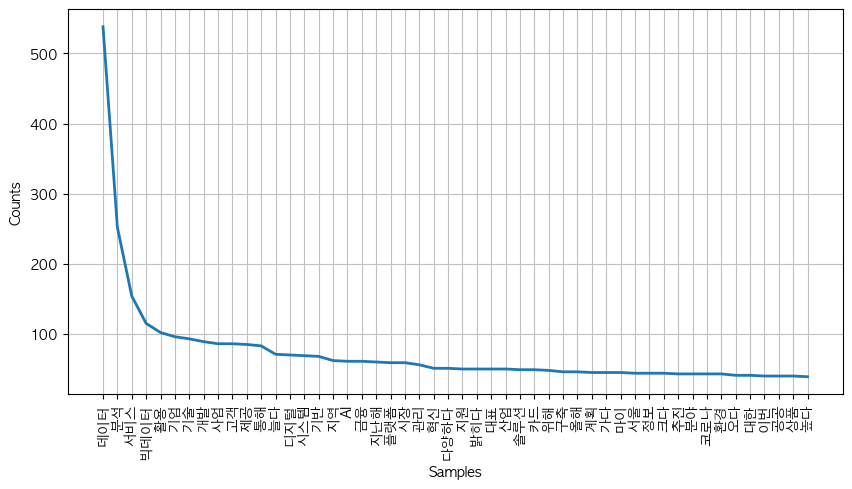

<Axes: xlabel='Samples', ylabel='Counts'>

In [32]:
rc('font', family='AppleGothic')

word_counted = nltk.Text(word_cleaned) 
plt.figure(figsize=(10, 5))
word_counted.plot(50)

In [34]:
word_frequency = nltk.FreqDist(word_cleaned)

In [35]:
df = pd.DataFrame(list(word_frequency.values()), word_frequency.keys()) 

result = df.sort_values([0], ascending=False)# 빈도 내림차순
result = result[:50]

<Axes: >

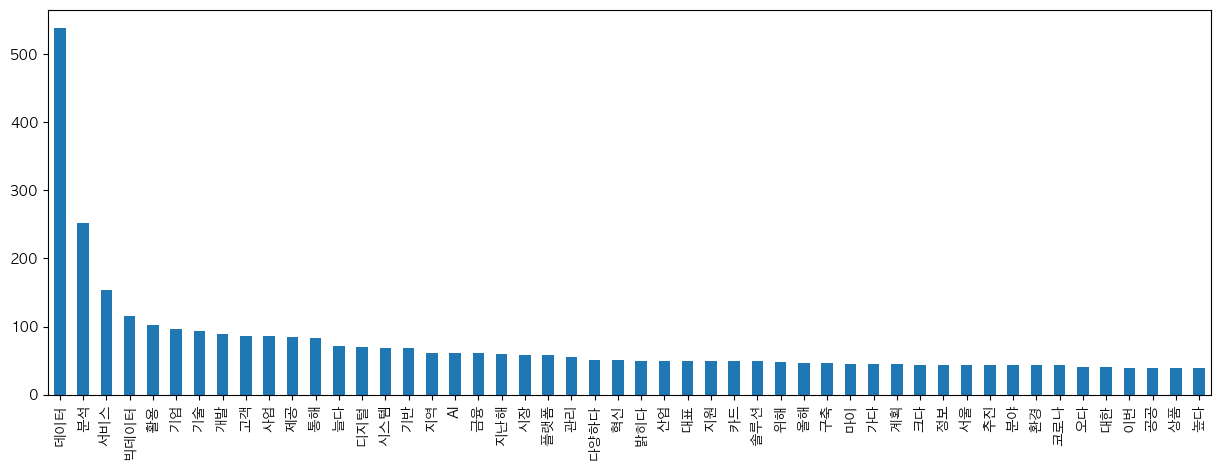

In [36]:
result.plot(kind='bar', legend=False, figsize=(15,5))

In [73]:
python_coloring = np.array(Image.open("python_mask.jpg"))

In [93]:
word_cloud = WordCloud(font_path="/System/Library/Fonts/Supplemental/AppleGothic.ttf",
                       # font_path="/System/Library/Fonts/Supplemental/AppleGothic.ttf"
                       width=3000, height=3000, # 워드클라우드의 크기 조정
                       #prefer_horizontal= 1.0, # 단어들이 가로로만 그려짐
                       background_color='white',
                       mask=python_coloring,
                       #max_font_size=100,
                       max_words=300).generate_from_frequencies(word_dic)# max word

In [89]:
# word_cloud.generate_from_frequencies(word_dic)

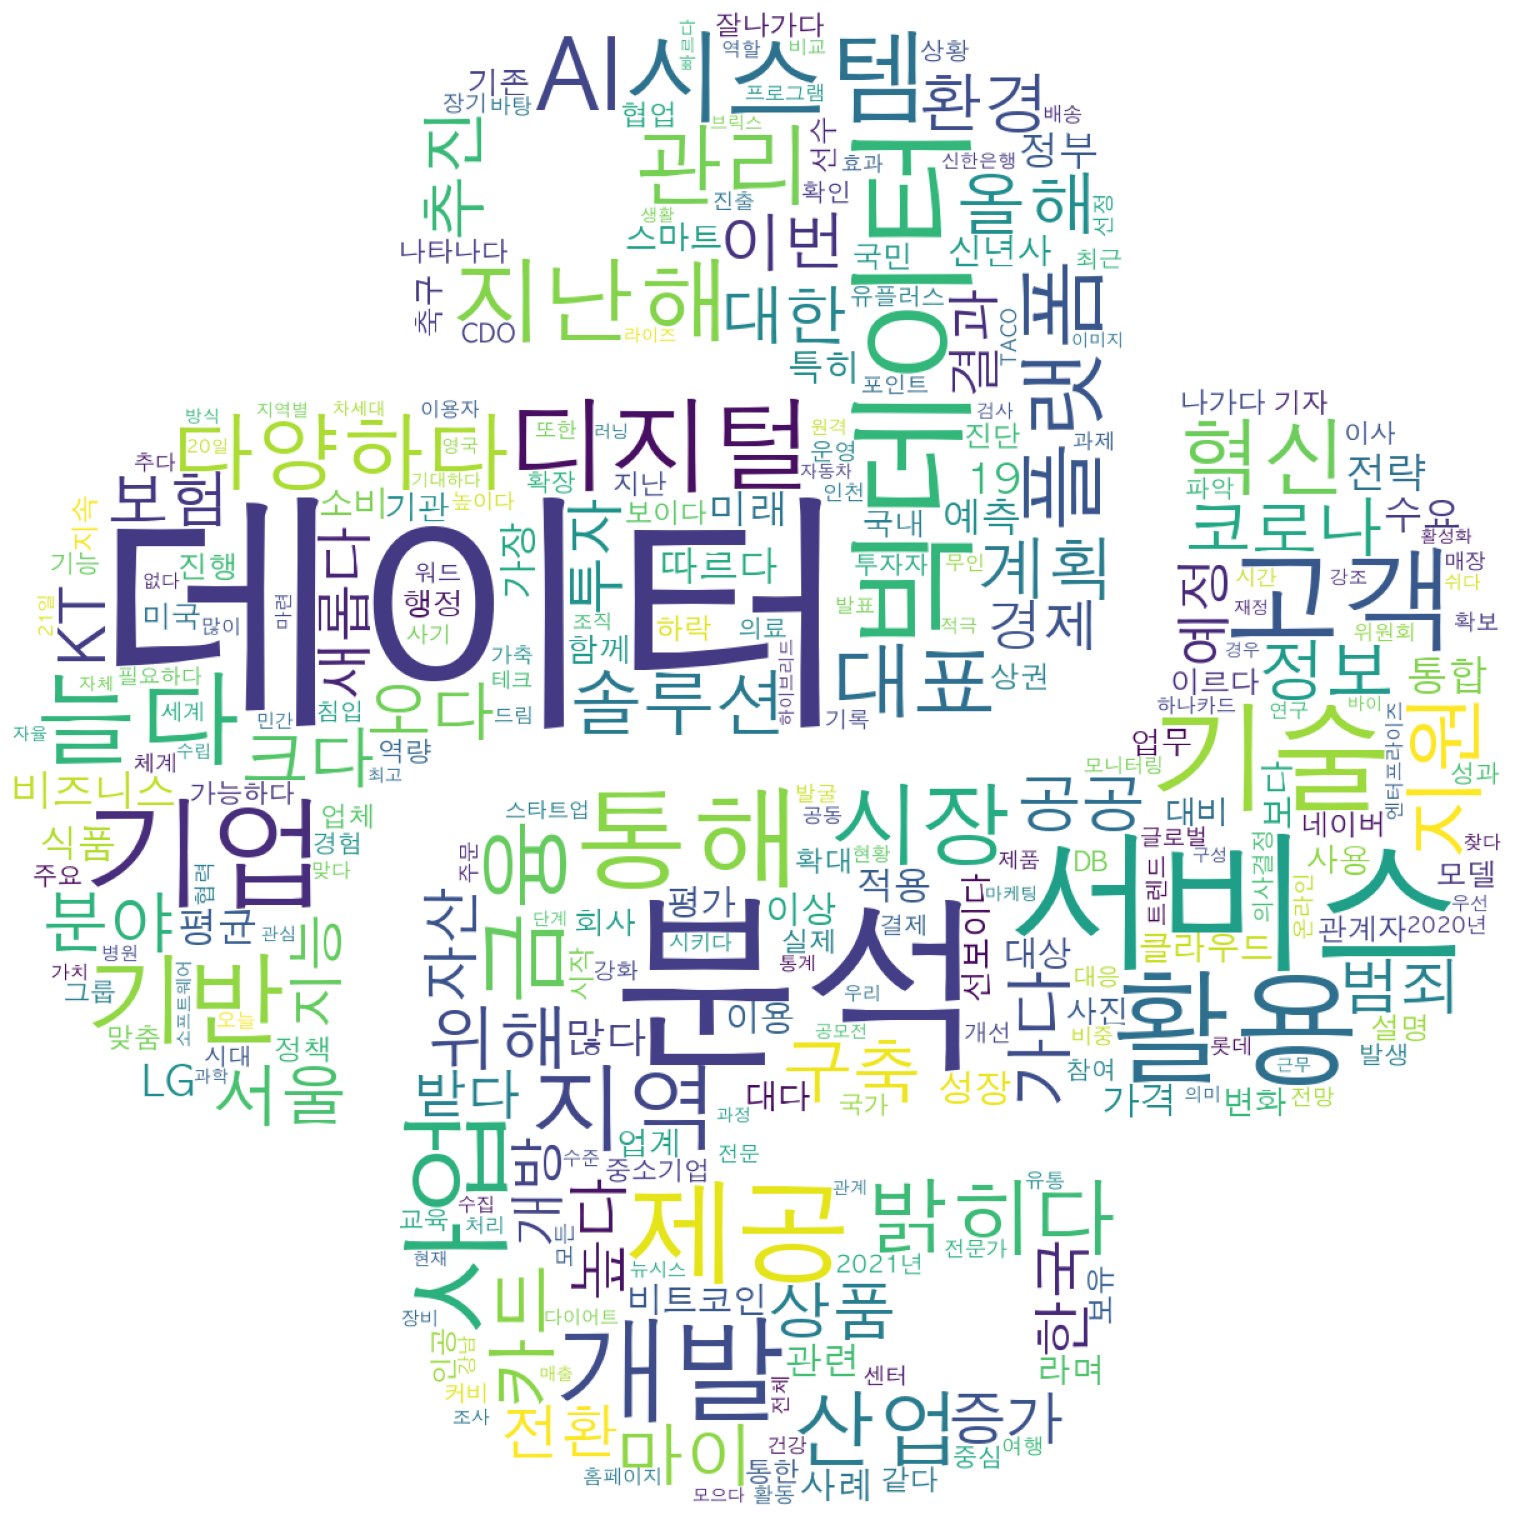

In [94]:
plt.figure(figsize=(15,15)) # 이 부분을 수정하시면 화면에서 보여지는 워드클라우드의 크기가 바뀝니다 
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

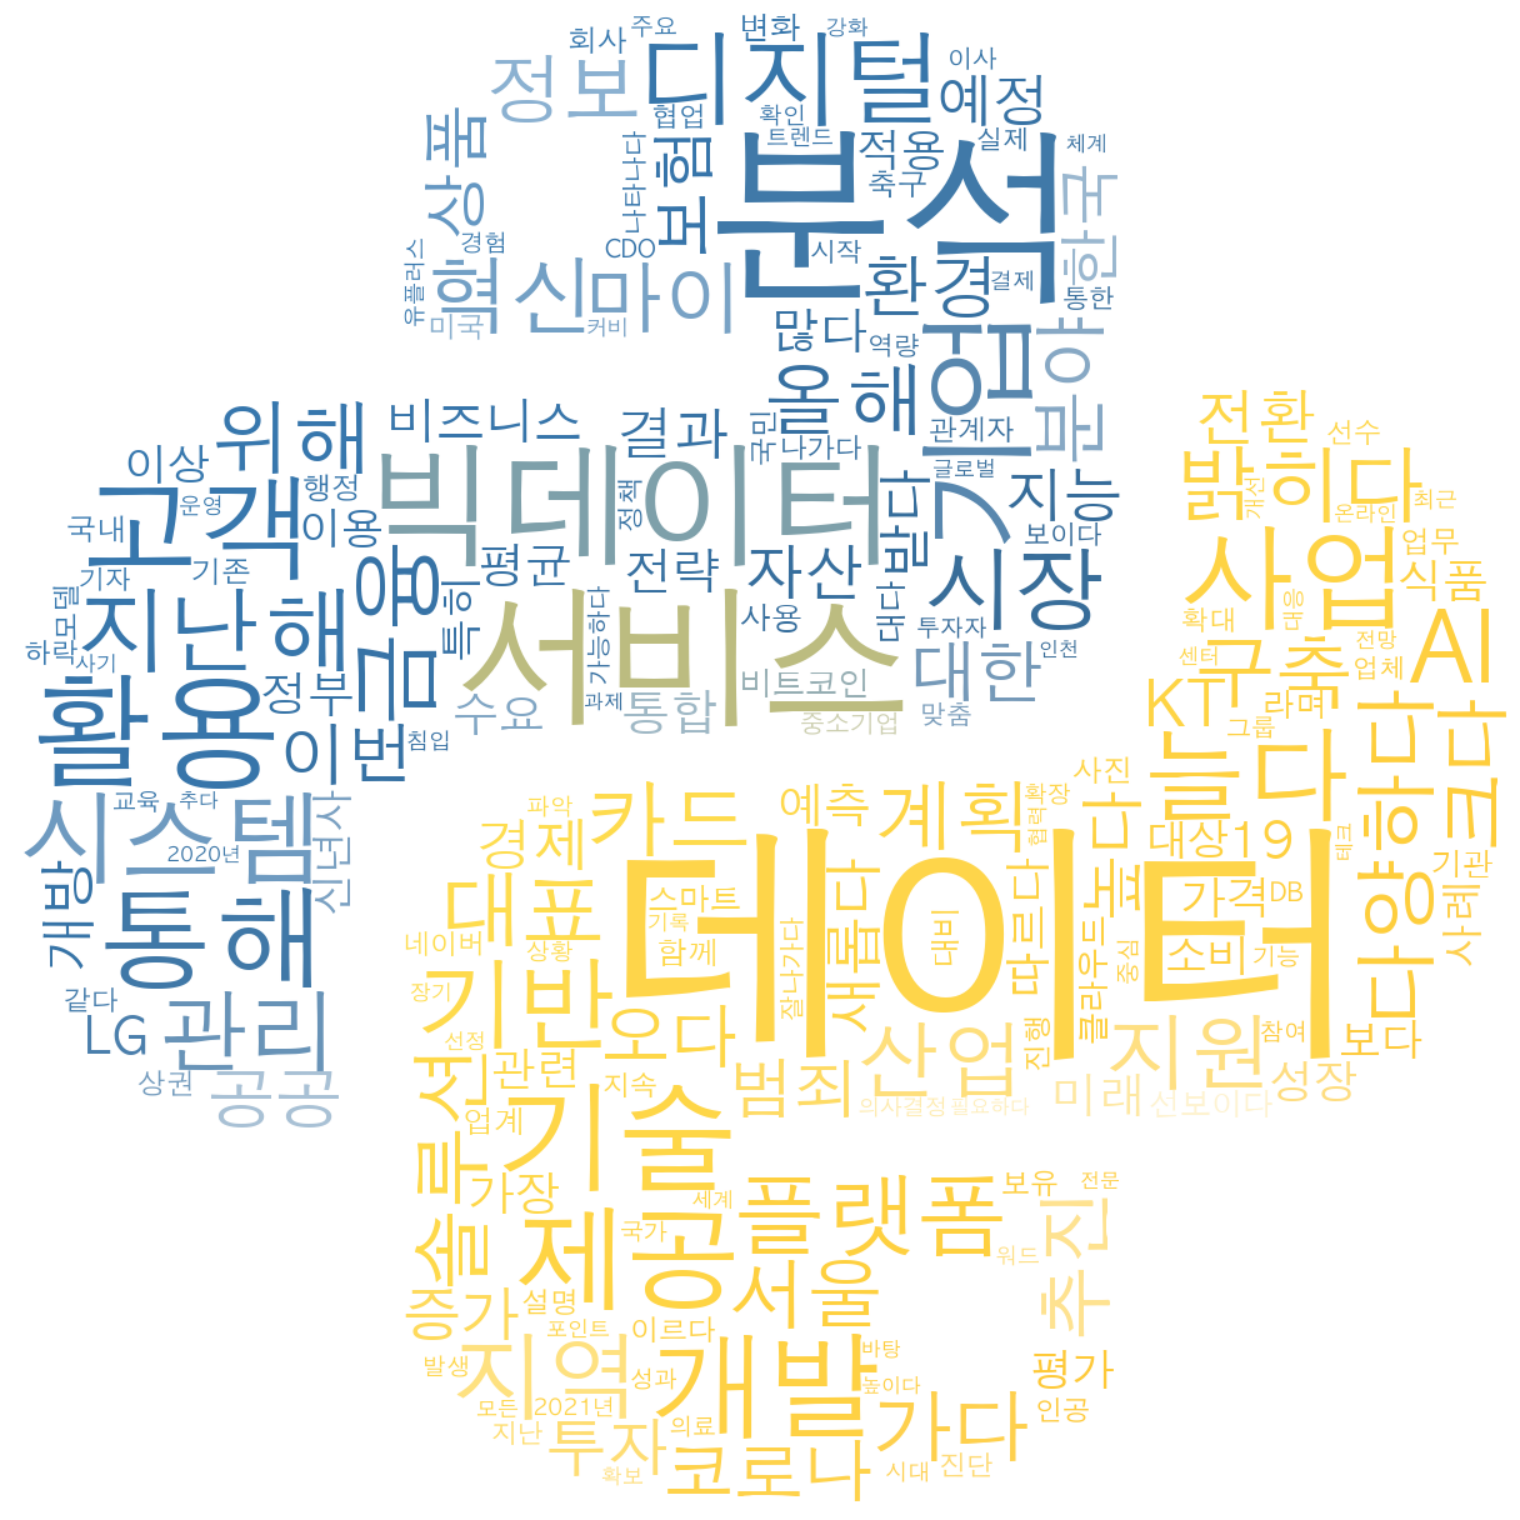

In [92]:
python_coloring = np.array(Image.open("python_mask.jpg"))
image_colors = ImageColorGenerator(python_coloring)

word_cloud = WordCloud(font_path="/System/Library/Fonts/Supplemental/AppleGothic.ttf",
                       width=2000, height=1000,
                       mask=python_coloring, 
                       background_color='white').generate_from_frequencies(word_dic)

plt.figure(figsize=(15,15))
plt.imshow(word_cloud.recolor(color_func=image_colors), interpolation='bilinear') # 다시(re) 색칠하기
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

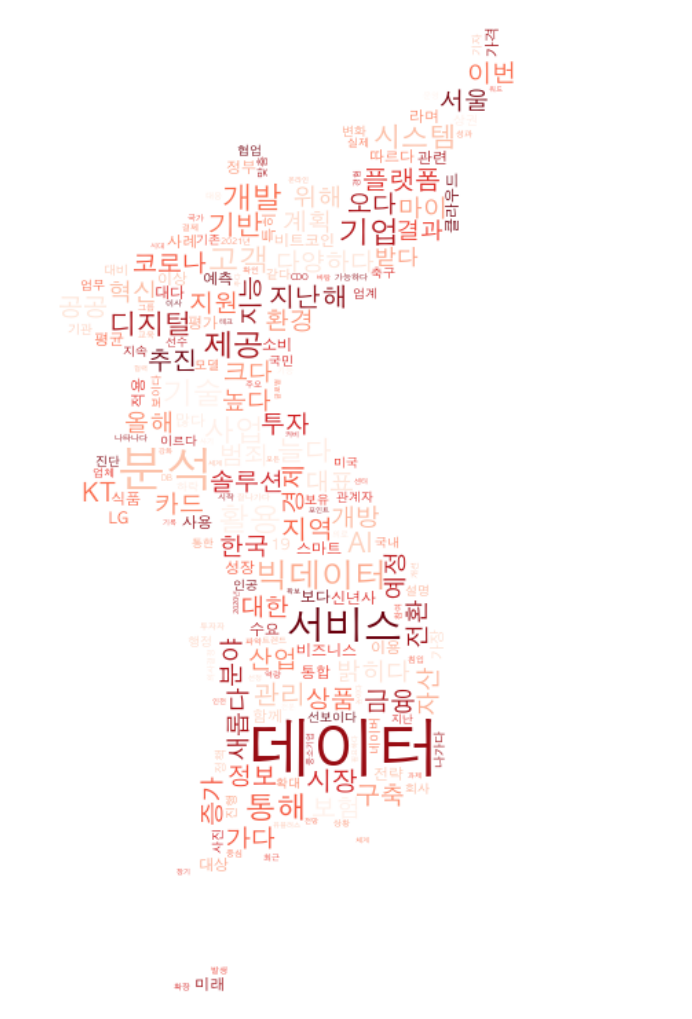

In [97]:
korea_coloring = np.array(Image.open("korea_mask.jpg"))

word_cloud = WordCloud(font_path="/System/Library/Fonts/Supplemental/AppleGothic.ttf", 
                       width=1600, height=1000, 
                       mask=korea_coloring, 
                       background_color='white').generate_from_frequencies(word_dic)

plt.figure(figsize=(10,10))
plt.imshow(word_cloud.recolor(colormap='Reds'), interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()